## ML LAB - 9

### 19BTRCR043
### Sai Sharanya Y
### Financial Time Series Monte Carlo Simulation on S&P 500 stock data.

***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/"))

['.config', 'all_stocks_5yr.csv', 'sample_data']


In [2]:
data =pd.read_csv("/content/all_stocks_5yr.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [4]:
data = data[data.Name == 'AAL']

Let's first use monte carlo simulation for forecasting

In [5]:
from scipy.stats import norm
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 250 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last closing price .

In [6]:
S0 = data.close.iloc[-1]
S0

51.4

In [7]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[51.4, 51.4, 51.4, ..., 51.4, 51.4, 51.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [8]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000
1,51.050954,49.629452,51.719685,52.619750,50.270536,50.433679,50.082194,51.901497,53.312128,51.338347,51.050954
2,50.398082,49.322838,52.012627,52.606407,50.392758,48.892201,49.644812,51.522797,54.307749,50.336292,50.398082
3,49.297098,49.005135,50.601724,51.776526,50.615926,48.993823,49.652824,51.210611,55.073874,51.368537,49.297098
4,49.462665,49.575788,52.035837,51.789410,52.268265,48.709695,48.725721,50.515124,54.116013,50.799462,49.462665


In [9]:
close = data.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

In [10]:
monte_carlo_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


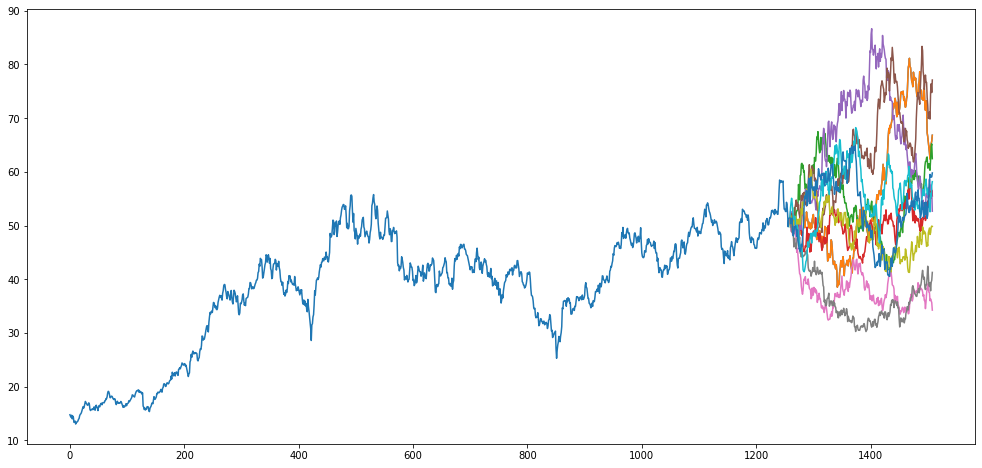

In [11]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()

In [12]:
#Let's see the distribution of the log returns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#Thanks to https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners 
trace = go.Histogram(x=log_returns,opacity=0.85,name = "Logarithmic Return", marker=dict(color='rgba(0, 0, 255, 0.8)'))
info = [trace]
layout = go.Layout(barmode='overlay',
                   title='Distribution of the Logarithmic Returns',
                   xaxis=dict(title='Logarithmic Return'),
                   yaxis=dict( title='Dist'),
)
fig = go.Figure(data=info, layout=layout)
iplot(fig)

ImportError: ignored

In [13]:
data['log_return'] = np.log(1 + data.close.pct_change())
data.reset_index(inplace=True)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.head()

,index,open,high,low,close,volume,Name,log_return
date,,,,,,,,
2013-02-08,0,15.07,15.12,14.63,14.75,8407500.0,AAL,NaN
2013-02-11,1,14.89,15.01,14.26,14.46,8882000.0,AAL,-0.019857
2013-02-12,2,14.45,14.51,14.10,14.27,8126000.0,AAL,-0.013227
2013-02-13,3,14.30,14.94,14.25,14.66,10259500.0,AAL,0.026963
2013-02-14,4,14.94,14.96,13.16,13.99,31879900.0,AAL,-0.046780


In [14]:
data = data.dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


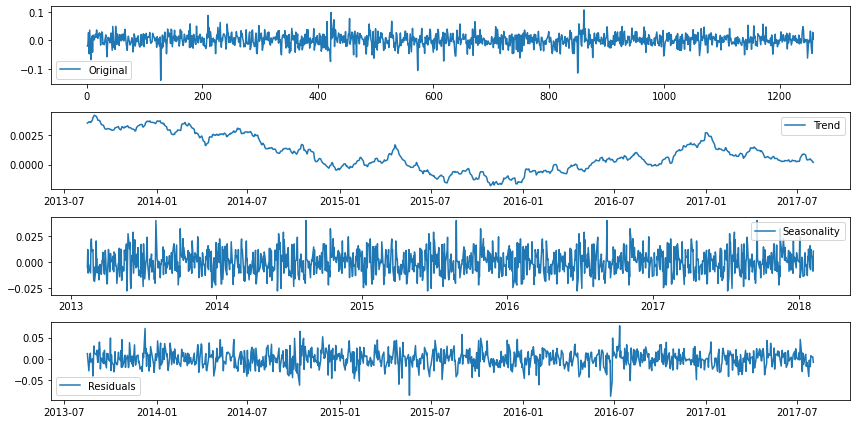

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.log_return, freq = 260) #Was there 260 workdays in a year?
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(log_returns, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

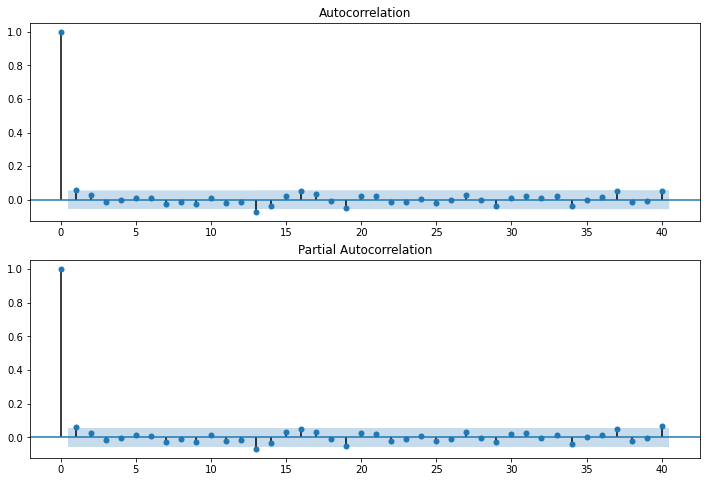

In [16]:
#Now we shall examine the serial correlation
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.log_return, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.log_return, lags=40, ax=ax2)
plt.show()

In [17]:
#Let's try to make an Auto Regressive Moving Average model
#I have found this code to find best paramaters for Ar(p) and Ma(q)
from statsmodels.tsa.stattools import ARMA
def best_AR_MA_checker(df,lower,upper):
    from statsmodels.tsa.stattools import ARMA
    from statsmodels.tsa.stattools import adfuller
    arg=np.arange(lower,upper)
    arg1=np.arange(lower,upper)
    best_param_i=0
    best_param_j=0
    temp=12000000
    rs=99
    for i in arg:
        for j in arg1:
            model=ARMA(df, order=(i,0,j))
            result=model.fit(disp=0)
            resid=adfuller(result.resid)
            if (result.aic<temp and  adfuller(result.resid)[1]<0.05):
                temp=result.aic
                best_param_i=i
                best_param_j=j
                rs=resid[1]
                
                print ("AR: %d, MA: %d, AIC: %d; resid stationarity check: %d"%(i,j,result.aic,resid[1]))
            
    print("the following function prints AIC criteria and finds the paramters for minimum AIC criteria")        
    print("best AR: %d, best MA: %d, best AIC: %d;  resid stationarity check:%d"%(best_param_i, best_param_j, temp, rs))     
best_AR_MA_checker(data.log_return,0,3) #For each parameter I want to try from 0 to 2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


AR: 0, MA: 0, AIC: -5974; resid stationarity check: 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


AR: 1, MA: 0, AIC: -5976; resid stationarity check: 0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 1, best MA: 0, best AIC: -5976;  resid stationarity check:0


In [19]:
#So, I wanna try arma(1,0)
from statsmodels.tsa.stattools import ARMA
model=ARMA(data.log_return, order=(1,0))
res=model.fit(disp=0)
print (res.summary())

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 1258
Model:                     ARMA(1, 0)   Log Likelihood                2991.154
Method:                       css-mle   S.D. of innovations              0.022
Date:                Thu, 16 Jun 2022   AIC                          -5976.308
Time:                        12:55:50   BIC                          -5960.896
Sample:                             0   HQIC                         -5970.516
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0010      0.001      1.476      0.140      -0.000       0.002
ar.L1.log_return     0.0582      0.028      2.066      0.039       0.003       0.113
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
